In [1]:
import anndata
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
slice1 = anndata.read_h5ad('/SABench/Data/DLPFC_processed/151673_processed.h5ad')
slice2 = anndata.read_h5ad('/SABench/Data/DLPFC_processed/151674_processed.h5ad')

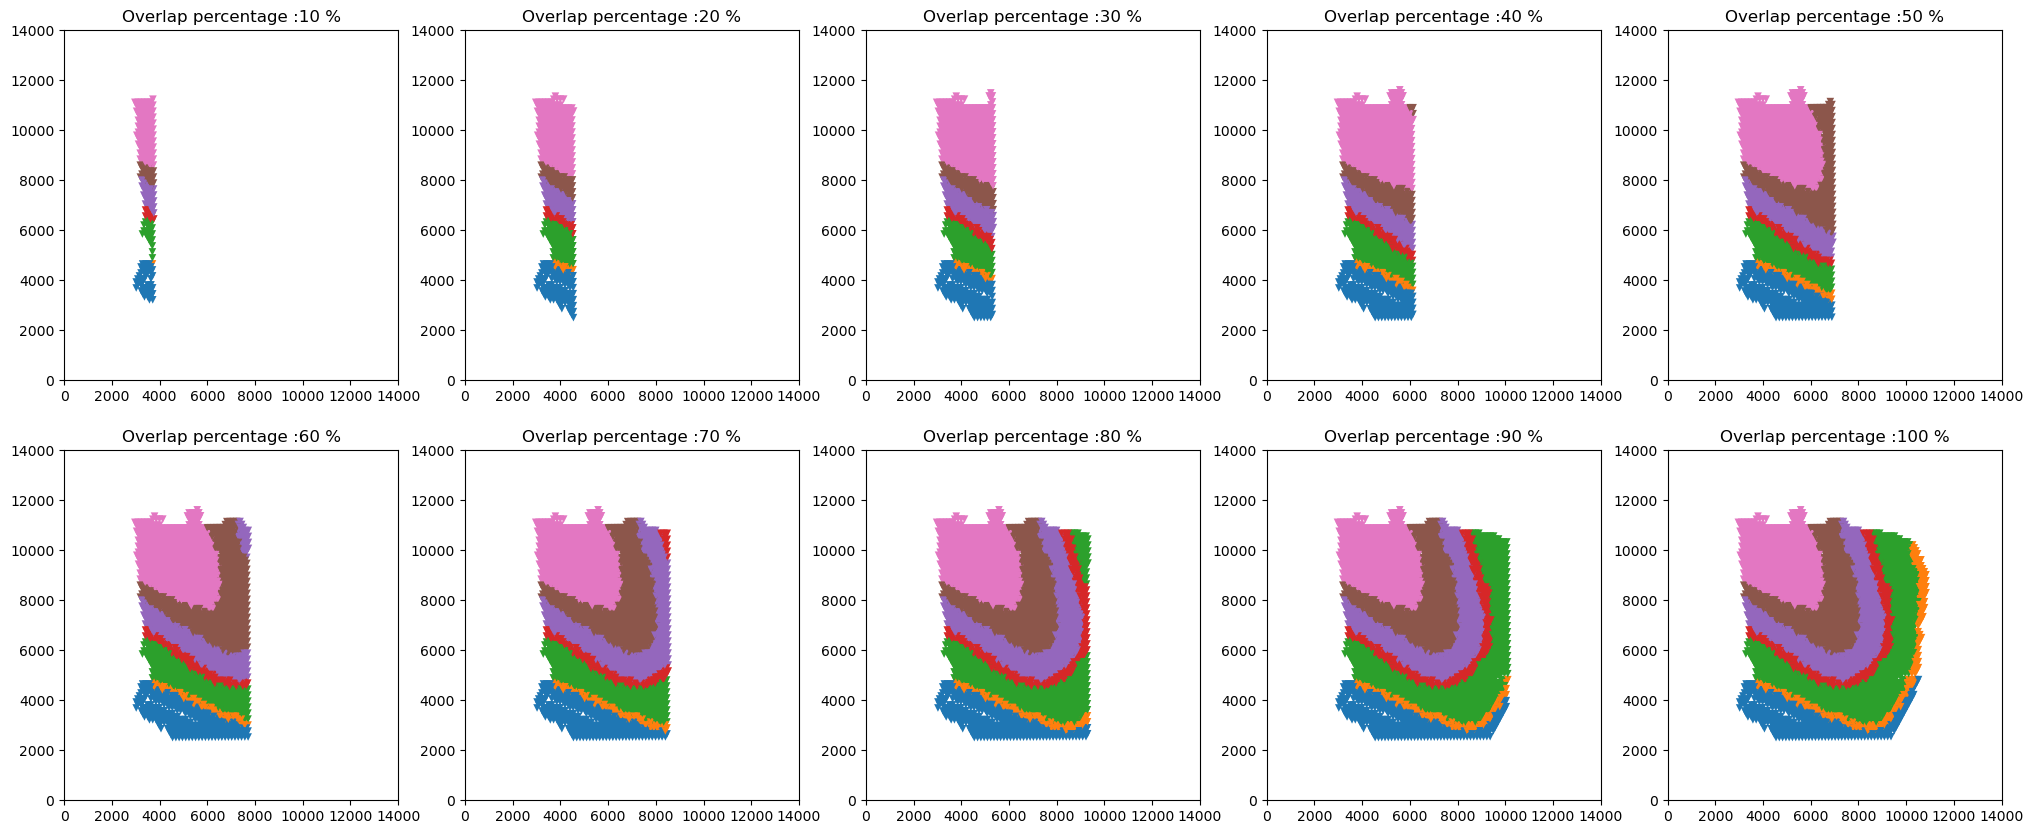

View of AnnData object with n_obs × n_vars = 3610 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'Region'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [12]:
def crop_adata(slice,overlap_percentage,save_path):
 
    ad = slice.copy()
    
    x_coords = ad.obsm['spatial'][:, 0]

    x_min = np.min(x_coords)
    x_max = np.max(x_coords)
    
    x_threshold = x_min + (x_max - x_min) * (overlap_percentage/100)
        
    # 
    indices = np.where(x_coords < x_threshold)[0]
    cropped_ad = ad[indices]
    cropped_ad.write_h5ad(save_path)
    return cropped_ad

percentage = [i for i in range(10, 101, 10)]
fig, axs = plt.subplots(2, 5, figsize=(25, 10)) 
axs=axs.flatten()
for index,ratio in enumerate(percentage):
    new_slice = crop_adata(slice2, ratio, f'/SABench/Data/DLPFC_cropped/151674_cropped_{ratio}%.h5ad')
   
    # 
    layer_to_color_map = {'Layer{0}'.format(i + 1): sns.color_palette()[i] for i in range(6)}
    layer_to_color_map['WM'] = sns.color_palette()[6]
    colors = list(new_slice.obs['Region'].astype('str').map(layer_to_color_map))

    axs[index].scatter(new_slice.obsm['spatial'][:, 0], new_slice.obsm['spatial'][:, 1], linewidth=0, s=30, marker="v", color=colors)  

    axs[index].set_title(f'Overlap percentage :{ratio} %')

    x_limits = (0,14000)
    y_limits = (0,14000)
    axs[index].set_xlim(x_limits)
    axs[index].set_ylim(y_limits)

plt.show()

crop_adata(slice1, 100, f'/SABench/Data/DLPFC_cropped/151673_cropped_100%.h5ad')